In [511]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from scipy.stats import poisson, uniform, expon, pareto
from scipy.optimize import minimize
from tqdm import tqdm
from mdptoolbox import mdp, util
import itertools
from scipy.sparse import csr_matrix, lil_matrix
from matplotlib.patches import Patch
import math
import random
import sympy as sp
from sympy.printing.latex import print_latex

In [117]:
# LFG
c1, c2 = sp.symbols('c1 c2')
v1, v2 = sp.symbols('v1 v2')
a      = sp.symbols('alpha')

x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
u1 = sp.simplify((c1-v1)*x1)
x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
u2 = sp.simplify((c2-v2)*x2)

In [153]:
foc1 = sp.simplify(sp.diff(u1, c1)).evalf(subs={a:0.1, v1:1})
foc2 = sp.simplify(sp.diff(u2, c2)).evalf(subs={a:0.1, v2:1})
foc1

c2**0.1*(-0.1*c1**0.1*(c1 - 1.0) + c1*(c1**0.1 + c2**0.1))/(c1*(c1**0.1 + c2**0.1)**2)

In [154]:
foc2

c1**0.1*(-0.1*c2**0.1*(c2 - 1.0) + c2*(c1**0.1 + c2**0.1))/(c2*(c1**0.1 + c2**0.1)**2)

In [155]:
print_latex(foc1)

\frac{c_{2}^{0.1} \left(- 0.1 c_{1}^{0.1} \left(c_{1} - 1.0\right) + c_{1} \left(c_{1}^{0.1} + c_{2}^{0.1}\right)\right)}{c_{1} \left(c_{1}^{0.1} + c_{2}^{0.1}\right)^{2}}


In [ ]:
sol = sp.solve((sp.Eq(foc1, 0), sp.Eq(foc2, 0)), (c1, c2), dict=True)

In [ ]:
sol

In [179]:
# 3 player
c1, c2, c3 = sp.symbols('c1 c2 c3')
v1, v2, v3 = sp.symbols('v1 v2 v3')
a      = sp.symbols('alpha')

x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
u1 = sp.simplify((c1-v1)*x1)
u2 = sp.simplify((c2-v2)*x2)
u3 = sp.simplify((c3-v3)*x3)
u1

c2**alpha*c3**alpha*(c1 - v1)/(c1**alpha*c2**alpha + c1**alpha*c3**alpha + c2**alpha*c3**alpha)

In [212]:
foc1 = sp.Eq(sp.simplify(sp.diff(u1, c1)), 0)
foc2 = sp.Eq(sp.simplify(sp.diff(u2, c2)), 0)
foc3 = sp.Eq(sp.simplify(sp.diff(u3, c3)), 0)
foc1 = foc1.evalf(subs={a:1})
foc2 = foc2.evalf(subs={a:1})
foc3 = foc3.evalf(subs={a:1})
foc1

Eq(c2*c3*(-c1*(c1 - v1)*(c2 + c3) + c1*(c1*c2 + c1*c3 + c2*c3))/(c1*(c1*c2 + c1*c3 + c2*c3)**2), 0)

In [213]:
sol = sp.solve((foc1, foc2, foc3), (c1, c2, c3), dict=True)

In [214]:
print_latex(sol)

\left[ \left\{ c_{1} : - \frac{2 v_{1} v_{2} v_{3}}{v_{1} v_{2} + v_{1} v_{3} - v_{2} v_{3}}, \  c_{2} : - \frac{2 v_{1} v_{2} v_{3}}{v_{1} v_{2} - v_{1} v_{3} + v_{2} v_{3}}, \  c_{3} : \frac{2 v_{1} v_{2} v_{3}}{v_{1} v_{2} - v_{1} v_{3} - v_{2} v_{3}}\right\}\right]


### MYERSONS

In [323]:
## MYSERSONS, forward direction
# prop allo
b1, b2 = sp.symbols('b1 b2')
v1, v2 = sp.symbols('v1 v2')
x1, x2 = sp.symbols('x1 x2')
z      = sp.symbols('z')

In [324]:
expr1 = z/(z+b2)
diff1 = sp.diff(expr1, z)
pay1 = sp.integrate(z*diff1, (z, 0, b1))
utility1 = sp.simplify(v1*(b1/(b1+b2)) - pay1)
utility1

(b1*v1 + b2*(b1 + b2)*(log(b2) + 1) - b2*(b2 + (b1 + b2)*log(b1 + b2)))/(b1 + b2)

In [325]:
expr2 = z/(z+b1)
diff2 = sp.diff(expr2, z)
pay2 = sp.integrate(z*diff2, (z, 0, b2))
utility2 = sp.simplify(v2*(b2/(b1+b2)) - pay2)
utility2

(b1*(b1 + b2)*(log(b1) + 1) - b1*(b1 + (b1 + b2)*log(b1 + b2)) + b2*v2)/(b1 + b2)

In [326]:
foc1 = sp.Eq(sp.diff(utility1, b1), 0)
foc2 = sp.Eq(sp.diff(utility2, b2), 0)
sol = sp.solve((foc1, foc2), (b1, b2), dict=True)
sol

[{b1: v1, b2: v2}]

In [369]:
## MYSERSONS, backward direction
# prop allo
c1, c2 = sp.symbols('c1 c2')
cm     = sp.symbols('c_m')
v1, v2 = sp.symbols('v1 v2')
x1, x2 = sp.symbols('x1 x2')
z      = sp.symbols('z')

In [370]:
expr1 = (1/z)/((1/z)+(1/c2))
diff1 = sp.diff(expr1, z)
pay1 = sp.integrate(z*sp.simplify(diff1), (z, c1, cm)) - 1/((1/cm) + (1/c2))
print_latex(pay1)
pay1

c_{2} \left(\frac{c_{2}}{c_{1} + c_{2}} + \log{\left(c_{1} + c_{2} \right)}\right) - c_{2} \left(\frac{c_{2}}{c_{2} + c_{m}} + \log{\left(c_{2} + c_{m} \right)}\right) - \frac{1}{\frac{1}{c_{m}} + \frac{1}{c_{2}}}


c2*(c2/(c1 + c2) + log(c1 + c2)) - c2*(c2/(c2 + c_m) + log(c2 + c_m)) - 1/(1/c_m + 1/c2)

In [371]:
expr2 = (1/z)/((1/z)+(1/c1))
diff2 = sp.diff(expr2, z)
pay2 = sp.integrate(z*sp.simplify(diff2), (z, c2, cm)) - 1/((1/cm) + (1/c1))
print_latex(pay2)
pay2

c_{1} \left(\frac{c_{1}}{c_{1} + c_{2}} + \log{\left(c_{1} + c_{2} \right)}\right) - c_{1} \left(\frac{c_{1}}{c_{1} + c_{m}} + \log{\left(c_{1} + c_{m} \right)}\right) - \frac{1}{\frac{1}{c_{m}} + \frac{1}{c_{1}}}


c1*(c1/(c1 + c2) + log(c1 + c2)) - c1*(c1/(c1 + c_m) + log(c1 + c_m)) - 1/(1/c_m + 1/c1)

In [374]:
# check utilities
x1 = (1/c1) / ((1/c1)+(1/c2))
x2 = (1/c2) / ((1/c1)+(1/c2))
u1 = -pay1 - v1 * x1
u2 = -pay2 - v2 * x2

foc1 = sp.Eq(sp.diff(u1, c1), 0)
foc2 = sp.Eq(sp.diff(u2, c2), 0)
sol = sp.solve((foc1, foc2), (c1, c2), dict=True)
sol

[{c1: v1, c2: v2}]

In [375]:
pay1.evalf(subs={cm:5, c2:1})

log(c1 + 1) - 2.79175946922805 + 1/(c1 + 1.0)

In [332]:
allo1 = (1/c1)/((1/c1)+(1/c2))
allo1

1/(c1*(1/c2 + 1/c1))

In [376]:
c1s = np.arange(0.001, 5, 0.001)
payfunc = sp.lambdify((c1), pay1.evalf(subs={cm:8, c2:1}))
allofunc = sp.lambdify((c1), allo1.evalf(subs={c2:1}))
pays1 = payfunc(c1s)
allos1 = allofunc(c1s)

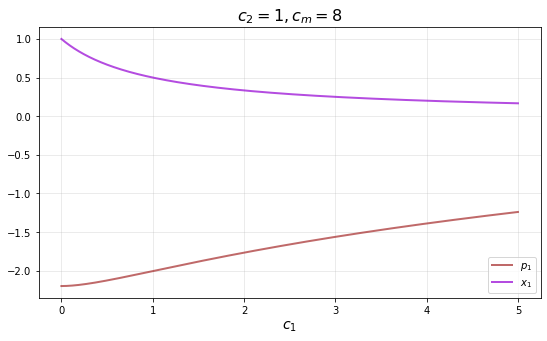

In [377]:
f, ax = plt.subplots(figsize=(9,5))

ax.plot(c1s, pays1, color='brown', linewidth=2, alpha=0.7, label=r'$p_1$')
ax.plot(c1s, allos1, color='darkviolet', linewidth=2, alpha=0.7, label=r'$x_1$')

ax.legend(loc=4)
ax.grid(alpha=0.3)
ax.set_title(r'$c_2=1, c_m=8$', size=16)
ax.set_xlabel(r'$c_1$', size=14)

plt.show()

In [378]:
pay1.evalf(subs={c1:1,cm:8})

c2*(c2/(c2 + 1.0) + log(c2 + 1)) - c2*(c2/(c2 + 8.0) + log(c2 + 8)) - 1/(0.125 + 1/c2)

In [379]:
pay1.evalf(subs={c1:1,c2:1,cm:8})

-2.00407739677627

In [380]:
c2s = [1, 2, 4]
c1s = np.arange(0.001, 8, 0.001)
payments, allos, payments2 = [], [], []
for _c2 in c2s:
    payfunc = sp.lambdify((c1), pay1.evalf(subs={cm:8, c2:_c2}))
    allofunc = sp.lambdify((c1), allo1.evalf(subs={c2:_c2}))
    pay2func = sp.lambdify((c1), pay2.evalf(subs={cm:8, c2:_c2}))
    payments.append(payfunc(c1s))
    allos.append(allofunc(c1s))
    payments2.append(pay2func(c1s))
payments = np.asarray(payments)
allos = np.asarray(allos)
payments2 = np.asarray(payments2)

In [381]:
payments.shape, allos.shape

((3, 7999), (3, 7999))

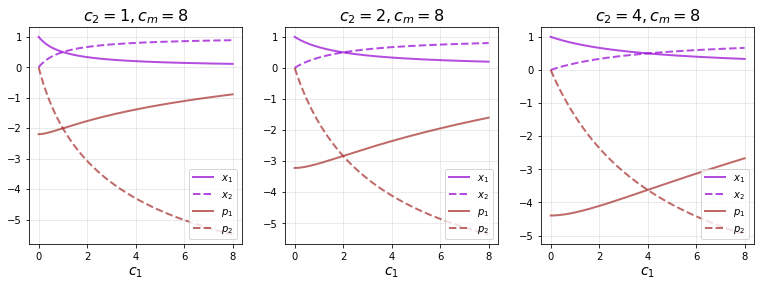

In [382]:
f, axarr = plt.subplots(ncols=3, figsize=(13,4))

for i in range(3):
    axarr[i].plot(c1s, allos[i], color='darkviolet', linewidth=2, alpha=0.7, label=r'$x_1$')
    axarr[i].plot(c1s, 1-allos[i], color='darkviolet', linewidth=2, alpha=0.7, label=r'$x_2$', 
                  linestyle='--')
    axarr[i].plot(c1s, payments[i], color='brown', linewidth=2, alpha=0.7, label=r'$p_1$')
    axarr[i].plot(c1s, payments2[i], color='brown', linewidth=2, alpha=0.7, label=r'$p_2$',
                  linestyle='--')
    
for ax in axarr:
    ax.legend(loc=4)
    ax.grid(alpha=0.3)
    ax.set_xlabel(r'$c_1$', size=14)

axarr[0].set_title(r'$c_2=1, c_m=8$', size=16)
axarr[1].set_title(r'$c_2=2, c_m=8$', size=16)
axarr[2].set_title(r'$c_2=4, c_m=8$', size=16)
plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')

plt.show()

In [383]:
## MYSERSONS, backward direction \alpha>1
c1, c2 = sp.symbols('c1 c2')
cm     = sp.symbols('c_m')
v1, v2 = sp.symbols('v1 v2')
x1, x2 = sp.symbols('x1 x2')
z      = sp.symbols('z')
a      = sp.symbols('alpha')

In [384]:
expr1 = (1/z)**a/((1/z)**a+(1/c2)**a)
diff1 = sp.diff(expr1, z)
pay1 = sp.integrate(z*sp.simplify(diff1), (z, c1, cm)) - 1/((1/cm) + (1/c2)) 
print_latex(pay1)
pay1

- \alpha \left(\frac{1}{c_{2}}\right)^{\alpha} \int\limits_{c_{1}}^{c_{m}} \frac{\left(\frac{1}{z}\right)^{\alpha}}{\left(\frac{1}{c_{2}}\right)^{2 \alpha} + 2 \left(\frac{1}{c_{2}}\right)^{\alpha} \left(\frac{1}{z}\right)^{\alpha} + \left(\frac{1}{z}\right)^{2 \alpha}}\, dz - \frac{1}{\frac{1}{c_{m}} + \frac{1}{c_{2}}}


-alpha*(1/c2)**alpha*Integral((1/z)**alpha/((1/c2)**(2*alpha) + 2*(1/c2)**alpha*(1/z)**alpha + (1/z)**(2*alpha)), (z, c1, c_m)) - 1/(1/c_m + 1/c2)

In [385]:
expr2 = (1/z)**a/((1/z)**a+(1/c1)**a)
diff2 = sp.diff(expr2, z)
pay2 = sp.integrate(z*sp.simplify(diff2), (z, c2, cm)) - 1/((1/cm) + (1/c1))
print_latex(pay2)
pay2

- \alpha \left(\frac{1}{c_{1}}\right)^{\alpha} \int\limits_{c_{2}}^{c_{m}} \frac{\left(\frac{1}{z}\right)^{\alpha}}{\left(\frac{1}{c_{1}}\right)^{2 \alpha} + 2 \left(\frac{1}{c_{1}}\right)^{\alpha} \left(\frac{1}{z}\right)^{\alpha} + \left(\frac{1}{z}\right)^{2 \alpha}}\, dz - \frac{1}{\frac{1}{c_{m}} + \frac{1}{c_{1}}}


-alpha*(1/c1)**alpha*Integral((1/z)**alpha/((1/c1)**(2*alpha) + 2*(1/c1)**alpha*(1/z)**alpha + (1/z)**(2*alpha)), (z, c2, c_m)) - 1/(1/c_m + 1/c1)

In [386]:
allo1 = (1/c1)**a/((1/c1)**a+(1/c2)**a)
allo1

(1/c1)**alpha/((1/c1)**alpha + (1/c2)**alpha)

In [389]:
sp.simplify(pay1.evalf(subs={a:1}))

-c2*(c_m + (c2 + c_m)*(c2/(c2 + c_m) - c2/(c1 + c2) - log(c1 + c2) + log(c2 + c_m)))/(c2 + c_m)

In [183]:
c1s = np.arange(0.001, 5, 0.001)
alpha=3
payfunc = sp.lambdify((c1), sp.simplify(pay1.evalf(subs={cm:5, c2:1, a:alpha})))
allofunc = sp.lambdify((c1), allo1.evalf(subs={c2:1, a:alpha}))
pays1 = payfunc(c1s)
allos1 = allofunc(c1s)

In [390]:
alphas = [1, 2, 3]
c1s = np.arange(0.001, 8, 0.001)
payments, allos, payments2 = [], [], []
for _alpha in alphas:
    payfunc = sp.lambdify((c1), sp.simplify(pay1.evalf(subs={cm:8, c2:4, a:_alpha})))
    allofunc = sp.lambdify((c1), allo1.evalf(subs={c2:4, a:_alpha}))
    pay2func = sp.lambdify((c1), sp.simplify(pay2.evalf(subs={cm:8, c2:4, a:_alpha})))
    payments.append(payfunc(c1s))
    allos.append(allofunc(c1s))
    payments2.append(pay2func(c1s))
payments = np.asarray(payments)
allos = np.asarray(allos)
payments2 = np.asarray(payments2)

In [391]:
payments.shape, allos.shape

((3, 7999), (3, 7999))

/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.8/site-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


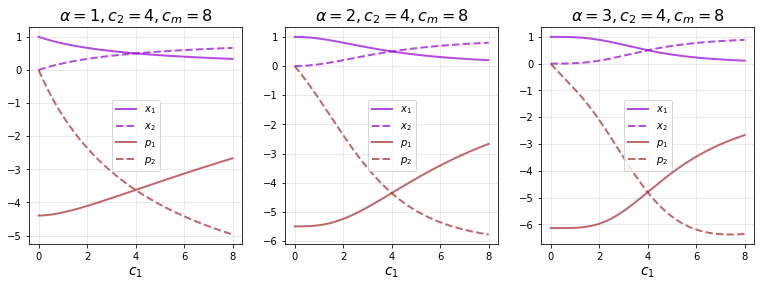

In [393]:
f, axarr = plt.subplots(ncols=3, figsize=(13,4))

for i in range(3):
    axarr[i].plot(c1s, allos[i], color='darkviolet', linewidth=2, alpha=0.7, label=r'$x_1$')
    axarr[i].plot(c1s, 1-allos[i], color='darkviolet', linewidth=2, alpha=0.7, label=r'$x_2$', 
                  linestyle='--')
    axarr[i].plot(c1s, payments[i], color='brown', linewidth=2, alpha=0.7, label=r'$p_1$')
    axarr[i].plot(c1s, payments2[i], color='brown', linewidth=2, alpha=0.7, label=r'$p_2$',
                  linestyle='--')
    
for ax in axarr:
    ax.legend()
    ax.grid(alpha=0.3)
    ax.set_xlabel(r'$c_1$', size=14)

axarr[0].set_title(r'$\alpha=1, c_2=4, c_m=8$', size=16)
axarr[1].set_title(r'$\alpha=2, c_2=4, c_m=8$', size=16)
axarr[2].set_title(r'$\alpha=3, c_2=4, c_m=8$', size=16)
plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')

plt.show()

In [196]:
# bounding total payment, alpha=1

In [394]:
c1, c2 = sp.symbols('c1 c2')
cm     = sp.symbols('c_m')
v1, v2 = sp.symbols('v1 v2')
x1, x2 = sp.symbols('x1 x2')
z      = sp.symbols('z')

In [395]:
expr1 = (1/z)/((1/z)+(1/c2))
diff1 = sp.diff(expr1, z)
pay1 = sp.integrate(z*sp.simplify(diff1), (z, c1, cm)) - 1/((1/cm) + (1/c2))
print_latex(pay1)
pay1

c_{2} \left(\frac{c_{2}}{c_{1} + c_{2}} + \log{\left(c_{1} + c_{2} \right)}\right) - c_{2} \left(\frac{c_{2}}{c_{2} + c_{m}} + \log{\left(c_{2} + c_{m} \right)}\right) - \frac{1}{\frac{1}{c_{m}} + \frac{1}{c_{2}}}


c2*(c2/(c1 + c2) + log(c1 + c2)) - c2*(c2/(c2 + c_m) + log(c2 + c_m)) - 1/(1/c_m + 1/c2)

In [396]:
expr2 = (1/z)/((1/z)+(1/c1))
diff2 = sp.diff(expr2, z)
pay2 = sp.integrate(z*sp.simplify(diff2), (z, c2, cm)) - 1/((1/cm) + (1/c1))
print_latex(pay2)
pay2

c_{1} \left(\frac{c_{1}}{c_{1} + c_{2}} + \log{\left(c_{1} + c_{2} \right)}\right) - c_{1} \left(\frac{c_{1}}{c_{1} + c_{m}} + \log{\left(c_{1} + c_{m} \right)}\right) - \frac{1}{\frac{1}{c_{m}} + \frac{1}{c_{1}}}


c1*(c1/(c1 + c2) + log(c1 + c2)) - c1*(c1/(c1 + c_m) + log(c1 + c_m)) - 1/(1/c_m + 1/c1)

In [415]:
Pt = pay1 + pay2
print_latex(Pt)

c_{1} \left(\frac{c_{1}}{c_{1} + c_{2}} + \log{\left(c_{1} + c_{2} \right)}\right) - c_{1} \left(\frac{c_{1}}{c_{1} + c_{m}} + \log{\left(c_{1} + c_{m} \right)}\right) + c_{2} \left(\frac{c_{2}}{c_{1} + c_{2}} + \log{\left(c_{1} + c_{2} \right)}\right) - c_{2} \left(\frac{c_{2}}{c_{2} + c_{m}} + \log{\left(c_{2} + c_{m} \right)}\right) - \frac{1}{\frac{1}{c_{m}} + \frac{1}{c_{2}}} - \frac{1}{\frac{1}{c_{m}} + \frac{1}{c_{1}}}


In [420]:
_cm = 2
func = sp.lambdify([(c1, c2)], Pt.evalf(subs={cm:_cm}))
bounds = ((0, _cm),(0, _cm))
minimize(func, (0.5,0.5), method='SLSQP', bounds=bounds)

     fun: -1.999999985990768
     jac: array([-4.18424606e-05, -4.18424606e-05])
 message: 'Optimization terminated successfully'
    nfev: 21
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.99966524, 1.99966525])

In [421]:
pay1.evalf(subs={c2:c1})

-c1*(c1/(c1 + c_m) + log(c1 + c_m)) + c1*(log(2*c1) + 0.5) - 1/(1/c_m + 1/c1)

In [423]:
_cm = 10
func = sp.lambdify((c1), pay1.evalf(subs={cm:_cm, c2:c1}))
bounds = ((0, _cm),)
out = minimize(func, 0.1, method='SLSQP', bounds=bounds)
out.x[0], out.fun[0]

(9.99971790444955, -4.99999999900525)

In [414]:
out

     fun: array([-5.])
     jac: array([-7.56978989e-06])
 message: 'Optimization terminated successfully'
    nfev: 18
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([9.9997179])

In [302]:
optC1s, minPays = [], []
cms = np.arange(1, 100, 0.1)
for _cm in tqdm(cms):
    func = sp.lambdify((c1), pay1.evalf(subs={cm:_cm, c2:c1}))
    bounds = ((0, _cm),)
    out = minimize(func, 0.1, method='SLSQP', bounds=bounds)
    optC1s.append(out.x[0])
    minPays.append(out.fun[0])
optC1s, minPays = np.asarray(optC1s), np.asarray(minPays)

100%|██████████| 990/990 [00:08<00:00, 110.88it/s]


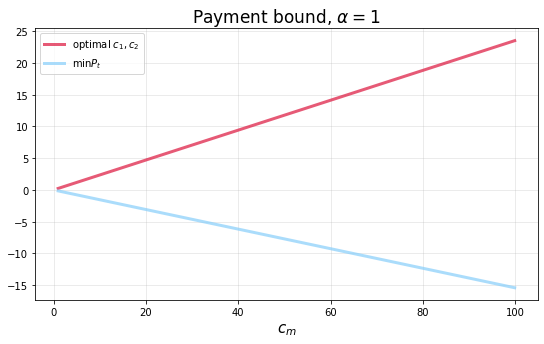

In [313]:
f, ax = plt.subplots(figsize=(9,5))

ax.plot(cms, optC1s, linewidth=3, alpha=0.7, color='crimson', label=r'optimal $c_1,c_2$')
ax.plot(cms, minPays, linewidth=3, alpha=0.7, color='lightskyblue', label=r'$\min P_t$')


ax.set_xlabel(r'$c_m$', size=15)
ax.set_title(r'Payment bound, $\alpha=1$', size=17)

ax.grid(alpha=0.3)
ax.legend()
plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

In [410]:
Pt

c1*(c1/(c1 + c2) + log(c1 + c2)) - c1*(c1/(c1 + c_m) + log(c1 + c_m)) + c2*(c2/(c1 + c2) + log(c1 + c2)) - c2*(c2/(c2 + c_m) + log(c2 + c_m)) - 1/(1/c_m + 1/c2) - 1/(1/c_m + 1/c1)

In [411]:
Pt.evalf(subs={c2:cm, c1:cm})

-c_m

In [427]:
# bounding total payment, alpha>1

In [428]:
c1, c2 = sp.symbols('c1 c2')
cm     = sp.symbols('c_m')
v1, v2 = sp.symbols('v1 v2')
x1, x2 = sp.symbols('x1 x2')
a      = sp.symbols('a')
z      = sp.symbols('z')

In [441]:
expr1 = (1/z)**a/((1/z)**a+(1/c2)**a)
diff1 = sp.diff(expr1, z)
pay1 = sp.integrate(z*sp.simplify(diff1), (z, c1, cm)) - (1/cm**(a-1))/((1/cm)**a + (1/c2)**a)
print_latex(pay1)
pay1

- a \left(\frac{1}{c_{2}}\right)^{a} \int\limits_{c_{1}}^{c_{m}} \frac{\left(\frac{1}{z}\right)^{a}}{\left(\frac{1}{c_{2}}\right)^{2 a} + 2 \left(\frac{1}{c_{2}}\right)^{a} \left(\frac{1}{z}\right)^{a} + \left(\frac{1}{z}\right)^{2 a}}\, dz - \frac{c_{m}^{1 - a}}{\left(\frac{1}{c_{2}}\right)^{a} + \left(\frac{1}{c_{m}}\right)^{a}}


-a*(1/c2)**a*Integral((1/z)**a/((1/c2)**(2*a) + 2*(1/c2)**a*(1/z)**a + (1/z)**(2*a)), (z, c1, c_m)) - c_m**(1 - a)/((1/c2)**a + (1/c_m)**a)

In [442]:
expr2 = (1/z)**a/((1/z)**a+(1/c1)**a)
diff2 = sp.diff(expr2, z)
pay2 = sp.integrate(z*sp.simplify(diff2), (z, c2, cm)) - (1/cm**(a-1))/((1/cm)**a + (1/c1)**a)
print_latex(pay2)
pay2

- a \left(\frac{1}{c_{1}}\right)^{a} \int\limits_{c_{2}}^{c_{m}} \frac{\left(\frac{1}{z}\right)^{a}}{\left(\frac{1}{c_{1}}\right)^{2 a} + 2 \left(\frac{1}{c_{1}}\right)^{a} \left(\frac{1}{z}\right)^{a} + \left(\frac{1}{z}\right)^{2 a}}\, dz - \frac{c_{m}^{1 - a}}{\left(\frac{1}{c_{1}}\right)^{a} + \left(\frac{1}{c_{m}}\right)^{a}}


-a*(1/c1)**a*Integral((1/z)**a/((1/c1)**(2*a) + 2*(1/c1)**a*(1/z)**a + (1/z)**(2*a)), (z, c2, c_m)) - c_m**(1 - a)/((1/c1)**a + (1/c_m)**a)

In [443]:
Pt = pay1 + pay2
# print_latex(Pt)
sp.simplify(Pt.evalf(subs={a:1}))

-(c1*c_m*(c2 + c_m) + c1*(c1 + c_m)*(c2 + c_m)*(c1/(c1 + c_m) - c1/(c1 + c2) - log(c1 + c2) + log(c1 + c_m)) + c2*c_m*(c1 + c_m) + c2*(c1 + c_m)*(c2 + c_m)*(c2/(c2 + c_m) - c2/(c1 + c2) - log(c1 + c2) + log(c2 + c_m)))/((c1 + c_m)*(c2 + c_m))

In [470]:
func1 = sp.lambdify([(c1, c2)], sp.simplify(Pt.evalf(subs={cm:_cm, a:1/2})))
func2 = lambda c1, c2: func1([c1,c2]).real
func2(1,6)

-6.852674014801991

In [472]:
_cm = 8
func1 = sp.lambdify([(c1, c2)], sp.simplify(Pt.evalf(subs={cm:_cm, a:3/2})))
func2 = lambda c: func1([c[0],c[1]]).real
bounds = ((0, _cm),(0, _cm))
minimize(func2, (0.4,0.5), method='SLSQP', bounds=bounds)

     fun: -7.9999953487492865
     jac: array([ 1.78813934e-07, -7.28547573e-04])
 message: 'Optimization terminated successfully'
    nfev: 25
     nit: 8
    njev: 8
  status: 0
 success: True
       x: array([8.        , 7.98592091])

## WELFARE tradeoff

In [504]:
## welfare
v1 = sp.Symbol('v1', positive=True)
v2 = sp.Symbol('v2', positive=True)
a  = sp.Symbol('alpha', positive=True)

In [505]:
u1 = -((1/v1)**(a-1)/((1/v1)**a+(1/v2)**a))
u2 = -((1/v2)**(a-1)/((1/v1)**a+(1/v2)**a))
u1

-v1**(1 - alpha)/(v2**(-alpha) + v1**(-alpha))

In [506]:
disutility = u1 + u2
disutility

-v1**(1 - alpha)/(v2**(-alpha) + v1**(-alpha)) - v2**(1 - alpha)/(v2**(-alpha) + v1**(-alpha))

In [507]:
disutility.evalf(subs={v1:1})

-v2**(1.0 - alpha)/(1.0 + v2**(-alpha)) - 1/(1.0 + v2**(-alpha))

In [522]:
func = sp.lambdify((a,v2), disutility.evalf(subs={v1:1}))
alphas = np.arange(1,5,0.01)

disutils = []
v2s = np.arange(2,10)
for _v2 in v2s:
    disutils.append(func(alphas, _v2))
disutils = np.asarray(disutils)
disutils.shape

(8, 400)

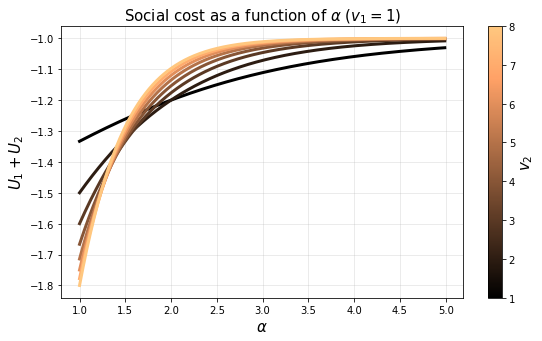

In [528]:
f, ax = plt.subplots(figsize=(9,5))

c = np.arange(1, len(v2s)+1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.copper)
cmap.set_array([])

for i, du in enumerate(disutils):
    ax.plot(alphas, disutils[i], c=cmap.to_rgba(i + 1), linewidth=3, alpha=1)
    
bar = f.colorbar(cmap)
# bar.set_ticks(c[::2])
bar.set_label(r'$v_2$', size=15)
ax.set_xlabel(r'$\alpha$', size=15)
ax.set_ylabel(r'$U_1+U_2$', size=15)
ax.set_title(r'Social cost as a function of $\alpha$ ($v_1=1$)', size=15)
ax.grid(alpha=0.3)
plt.savefig('out.png', dpi=400, bbox_inches='tight', facecolor='white')
plt.show()

In [560]:
prop1 = sp.simplify((u1 - u1.evalf(subs={a:1})) / u1.evalf(subs={a:1}))
prop2 = sp.simplify((u2 - u2.evalf(subs={a:1})) / u2.evalf(subs={a:1}))
print_latex(sp.simplify(prop1 + prop2))

\frac{v_{1} \left(v_{1} v_{2}^{\alpha} - v_{1}^{\alpha} v_{2}\right) + v_{2} \left(- v_{1} v_{2}^{\alpha} + v_{1}^{\alpha} v_{2}\right)}{v_{1} v_{2} \left(v_{1}^{\alpha} + v_{2}^{\alpha}\right)}


In [558]:
print_latex(v1*(v1*v2**a-v1**a*v2) + v2*(-v1*v2**a + v1**a*v2))

v_{1} \left(v_{1} v_{2}^{\alpha} - v_{1}^{\alpha} v_{2}\right) + v_{2} \left(- v_{1} v_{2}^{\alpha} + v_{1}^{\alpha} v_{2}\right)


In [559]:
print_latex(sp.simplify(v1*(v1*v2**a-v1**a*v2) + v2*(-v1*v2**a + v1**a*v2)))

\left(v_{1} - v_{2}\right) \left(v_{1} v_{2}^{\alpha} - v_{1}^{\alpha} v_{2}\right)


In [ ]:
sp.simplify(sp.expand(v1*(v1*v2**a-v1**a*v2) + v2*(-v1*v2**a + v1**a*v2)))

# PNE

In [592]:
# two play
v1 = sp.Symbol('v1', positive=True)
v2 = sp.Symbol('v2', positive=True)
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
a  = sp.Symbol('alpha', positive=True)

x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a))
u1 = sp.simplify((c1-v1)*x1)
x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a))
u2 = sp.simplify((c2-v2)*x2)

In [633]:
foc1 = sp.simplify(sp.diff(u1, c1)).evalf(subs={a:1/2, v1:1})
foc2 = sp.simplify(sp.diff(u2, c2)).evalf(subs={a:1/2, v2:1})
foc1

(-0.5*c1**0.5*c2**0.5*(c1 - 1.0) + c1*c2**0.5*(c1**0.5 + c2**0.5))/(c1*(c1**0.5 + c2**0.5)**2)

In [634]:
foc2

(-0.5*c1**0.5*c2**0.5*(c2 - 1.0) + c1**0.5*c2*(c1**0.5 + c2**0.5))/(c2*(c1**0.5 + c2**0.5)**2)

In [635]:
sol = sp.solve((sp.Eq(foc1, 0), sp.Eq(foc2, 0)), (c1, c2), dict=True)
sol

[]

In [636]:
# three play
v1 = sp.Symbol('v1', positive=True)
v2 = sp.Symbol('v2', positive=True)
v3 = sp.Symbol('v3', positive=True)
c1 = sp.Symbol('c1', positive=True)
c2 = sp.Symbol('c2', positive=True)
c3 = sp.Symbol('c3', positive=True)
a  = sp.Symbol('alpha', positive=True)

x1 = 1/(c1**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
x2 = 1/(c2**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
x3 = 1/(c3**a) / (1/(c1**a) + 1/(c2**a) + 1/(c3**a))
u1 = sp.simplify((c1-v1)*x1)
u2 = sp.simplify((c2-v2)*x2)
u3 = sp.simplify((c3-v3)*x3)

In [652]:
_a = 1
foc1 = sp.simplify(sp.diff(u1, c1)).evalf(subs={a:_a, v1:1})
foc2 = sp.simplify(sp.diff(u2, c2)).evalf(subs={a:_a, v2:1})
foc3 = sp.simplify(sp.diff(u3, c3)).evalf(subs={a:_a, v3:1})
foc1

c2*c3*(c1*(c1*c2 + c1*c3 + c2*c3)**2 - (c1 - 1.0)*(c1*c2 + c1*c3)*(c1*c2 + c1*c3 + c2*c3))/(c1*(c1*c2 + c1*c3 + c2*c3)**3)

In [653]:
foc1

c2*c3*(c1*(c1*c2 + c1*c3 + c2*c3)**2 - (c1 - 1.0)*(c1*c2 + c1*c3)*(c1*c2 + c1*c3 + c2*c3))/(c1*(c1*c2 + c1*c3 + c2*c3)**3)

In [654]:
sol = sp.solve((
     sp.Eq(foc1, 0), 
     sp.Eq(foc2, 0),
     sp.Eq(foc3, 0),
    ), (c1, c2, c3), dict=True)
sol

[]

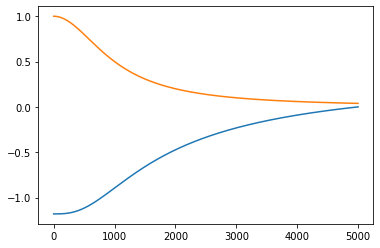

In [163]:
plt.plot(pays1)
plt.plot(allos1)

In [20]:
expr1

1/(z*(1/z + 1/c2))

In [14]:
expr2 = z/(z+b1)
diff2 = sp.diff(expr2, z)
pay2 = sp.integrate(z*diff2, (z, 0, b2))
utility2 = sp.simplify(v2*(b2/(b1+b2)) - pay2)
utility2

(b1*(b1 + b2)*(log(b1) + 1) - b1*(b1 + (b1 + b2)*log(b1 + b2)) + b2*v2)/(b1 + b2)

In [15]:
foc1 = sp.Eq(sp.diff(utility1, b1), 0)
foc2 = sp.Eq(sp.diff(utility2, b2), 0)
sol = sp.solve((foc1, foc2), (b1, b2), dict=True)
sol

[{b1: v1, b2: v2}]

In [10]:
b1 = sp.Symbol('b1')
f1 = sp.Function('f1')
b2 = sp.Symbol('b2')
f2 = sp.Function('f2')
v1, v2 = sp.symbols('v1 v2')

u1 = v1 * f1(b1) / (f1(b1) + f2(b2)) - b1
u2 = v2 * f2(b2) / (f1(b1) + f2(b2)) - b2

In [12]:
u2

-b2 + v2*f2(b2)/(f1(b1) + f2(b2))

In [21]:
sp.simplify(sp.diff(u1, b1))

v1*f2(b2)*Derivative(f1(b1), b1)/(f1(b1) + f2(b2))**2 - 1

In [19]:
foc1 = sp.Eq(sp.diff(u1, b1), 0)
foc2 = sp.Eq(sp.diff(u2, b2), 0)
foc1

Eq(v1*Derivative(f1(b1), b1)/(f1(b1) + f2(b2)) - v1*f1(b1)*Derivative(f1(b1), b1)/(f1(b1) + f2(b2))**2 - 1, 0)

In [20]:
sol = sp.solve((foc1, foc2), (b1, b2), dict=True)

NotImplementedError: could not solve _Dummy_36*v2*(f1(b1) + f2(b2))**2 - _Dummy_36*v2*(f1(b1) + f2(b2))*f2(b2) - (f1(b1) + f2(b2))**3